In [10]:
## (1) Importing dependencies
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
## (2) Read reference and scanned image
refFilename = "Bentley.jpg"
print("Reading reference image: ", refFilename)
im1 = cv2.imread(refFilename, cv2.IMREAD_COLOR)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

imFilename = "Pic_to_be_aligned.jpg"
print("Reading image to be aligned: ", imFilename)
im2 = cv2.imread(imFilename, cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

Reading reference image:  Bentley.jpg
Reading image to be aligned:  Pic_to_be_aligned.jpg


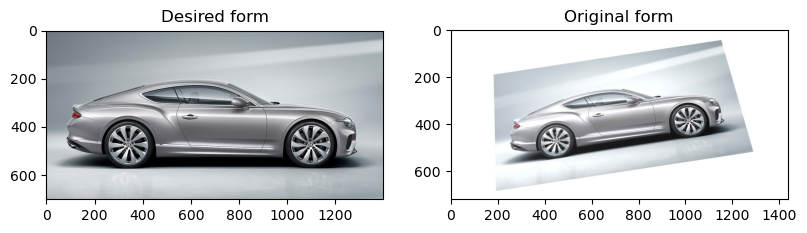

In [12]:
## (3) Display images
plt.figure(figsize=[20, 10])
plt.subplot(141); plt.imshow(im1); plt.title('Desired form')
plt.subplot(142); plt.imshow(im2); plt.title('Original form')
plt.show()

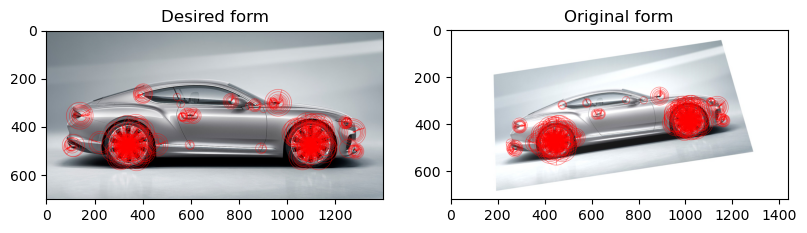

In [13]:
## (4) Finding keypoints in both images
# Converting images to grayscale
im1_gray = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_RGB2GRAY)

# ORB is the fastest feature detection algorithm
# Detect ORB features and compute descriptors
MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(im1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2_gray, None)

# Display the keypoints-annotated pictures
im1_display = cv2.drawKeypoints(im1, 
                                keypoints1, 
                                outImage=np.array([]), 
                                color = (255, 0, 0), 
                                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

im2_display = cv2.drawKeypoints(im2, 
                                keypoints2, 
                                outImage=np.array([]), 
                                color = (255, 0, 0), 
                                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=[20, 10])
plt.subplot(141); plt.imshow(im1_display); plt.title('Desired form')
plt.subplot(142); plt.imshow(im2_display); plt.title('Original form')
plt.show()

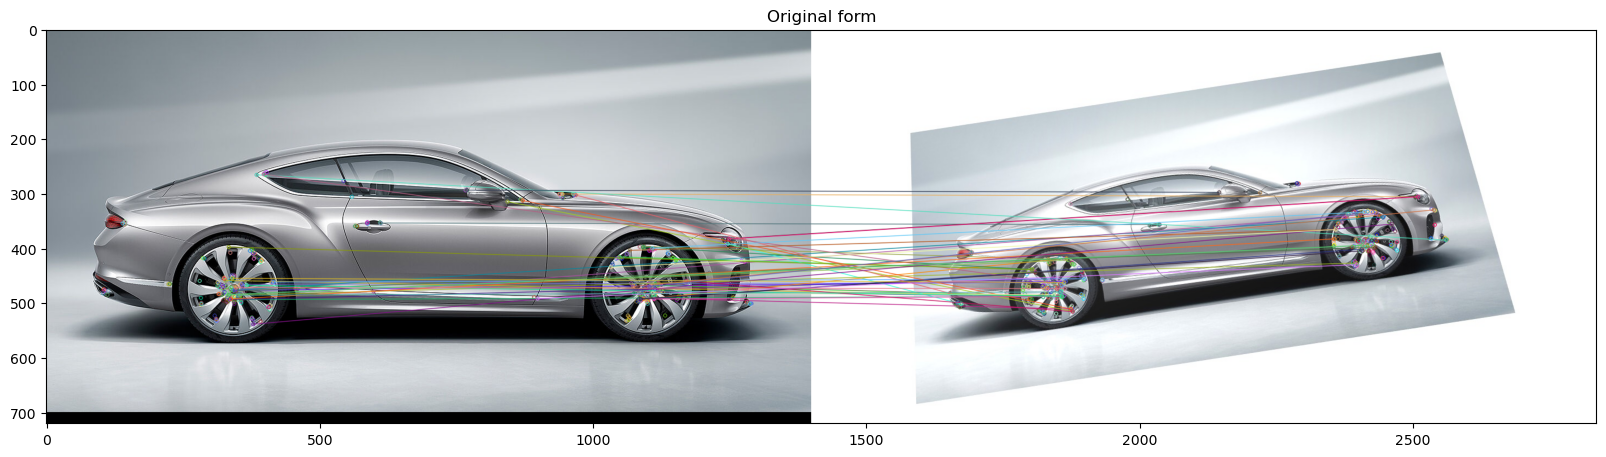

In [14]:
## (5) Match keypoints in both images
# Match features
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)

# Sorting matches by score
list(matches).sort(key=lambda x:x.distance, reverse=False)

# Remove not so good matches by just selecting top 10% of the matches
numGoodMatches = int(len(matches) * 0.1)
matches = matches[: numGoodMatches]

# Draw top matches
im_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)

plt.figure(figsize=[20, 10])
plt.imshow(im_matches); plt.title("Original form")
plt.show()

In [15]:
## (6) Find homography
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

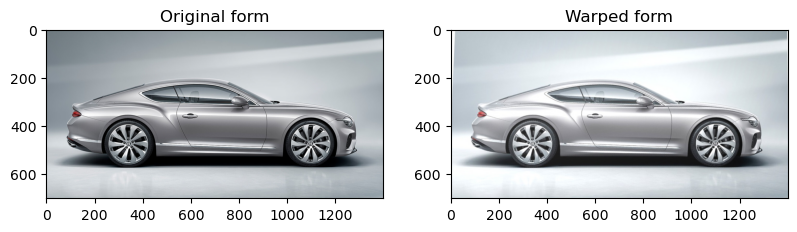

In [16]:
## (7) Warp image
# Use homography to warp image
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))

# Display results
plt.figure(figsize=[20, 10])
plt.subplot(141); plt.imshow(im1); plt.title('Original form')
plt.subplot(142); plt.imshow(im2_reg); plt.title('Warped form')
plt.show()